# Discovering Interpretable Features
---

In this notebook, we will learn another dimension reduction technique called **N**on-negative **M**atrix **F**actorization (NMF) that expresses the data as combinations of interpretable parts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

NMF models are:

* used for compressing the data (dimension reduction) like PCA
* **interpretable** *unlike* PCA as they are *easy to explain*
* used for:
  * expressing documents as combinations of topics
  * expressing images as combinations of patterns

However, using NMF requires the data to be non-negative (>=0)

To use the NMF model in sklearn is similar to PCA :

* they have `fit` and `transform` methods
* but you need to specify the `n_components` while creating the NMF model unlike PCA
* works with sparse matrcies represented in `csr_matrix` unlike PCA


We will use a dataset that shows some kind of word frequency 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Word-frequency array sample
documents =  ['cats say meow', 'dogs say woof', 'dogs chase cats']

tfidf = TfidfVectorizer()

dataset = tfidf.fit_transform(documents)

dataset

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

To print `dataset`, we need to convert it to `ndarray` using `toarray()` method.

In [37]:
dataset.toarray()

array([[0.51785612, 0.        , 0.        , 0.68091856, 0.51785612,
        0.        ],
       [0.        , 0.        , 0.51785612, 0.        , 0.51785612,
        0.68091856],
       [0.51785612, 0.68091856, 0.51785612, 0.        , 0.        ,
        0.        ]])

In [38]:
tfidf.get_feature_names()

['cats', 'chase', 'dogs', 'meow', 'say', 'woof']

In [39]:
from sklearn.decomposition import NMF

words_nmf_model = NMF(n_components=2)

words_nmf_model.fit(dataset)

C:\Users\U\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=2)

In [40]:
words_nmf_model.components_

array([[0.37319456, 0.490706  , 0.74638912, 0.        , 0.37319456,
        0.490706  ],
       [0.45195242, 0.        , 0.        , 0.5942678 , 0.45195242,
        0.        ]])

The shape of the NMF components is (the number of components, the features of the data set) so here it's (2, 6).

In [41]:
words_transformed = words_nmf_model.transform(dataset)

In [42]:
words_transformed

array([[6.71571671e-06, 1.14581283e+00],
       [6.93815202e-01, 0.00000000e+00],
       [6.93815202e-01, 0.00000000e+00]])

Now, for each "document", it's now compressed from 6 features into 2. And we can construct approximately the original data from the compressed form using the components of the NMF model. This is done by multiplying each NMF feature by the equivalent component.

In [43]:
words_transformed[0, :]

array([6.71571671e-06, 1.14581283e+00])

In [51]:
(words_transformed[0, 0] * words_nmf_model.components_[0, :] \
    + words_transformed[0, 1] * words_nmf_model.components_[1, :]).round(4)

array([0.5179, 0.    , 0.    , 0.6809, 0.5179, 0.    ])

In [45]:
dataset[0, :].toarray()

array([[0.51785612, 0.        , 0.        , 0.68091856, 0.51785612,
        0.        ]])

Let's look at another example,

In [49]:
wiki_df = pd.read_csv("assets/data/wiki.csv", index_col=0)

# to convert this dataframe to sparse matrix
from scipy.sparse import csr_matrix

articles = csr_matrix(wiki_df.transpose())

titles = list(wiki_df.columns)

Let's fit an NMF model to `articles` based on 6 components instead of 13k words.

In [53]:
wiki_nmf = NMF(n_components=6)

wiki_nmf.fit(articles)

nmf_features = wiki_nmf.transform(articles)

nmf_features[:10, :].round(4)

C:\Users\U\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.4405],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.5666],
       [0.0038, 0.    , 0.    , 0.    , 0.    , 0.3987],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.3818],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.4855],
       [0.0129, 0.0138, 0.0078, 0.0334, 0.    , 0.3345],
       [0.    , 0.    , 0.0207, 0.    , 0.006 , 0.3591],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.491 ],
       [0.0154, 0.0143, 0.0038, 0.0237, 0.0263, 0.4808],
       [0.0112, 0.0314, 0.0309, 0.0657, 0.0197, 0.3383]])

Let's create a dataframe from these features for our articles

In [54]:
wiki_transformed_df = pd.DataFrame(nmf_features, index=titles)
wiki_transformed_df.head()

,0,1,2,3,4,5
HTTP 404,0.000000,0.0,0.0,0.0,0.0,0.440490
Alexa Internet,0.000000,0.0,0.0,0.0,0.0,0.566636
Internet Explorer,0.003821,0.0,0.0,0.0,0.0,0.398669
HTTP cookie,0.000000,0.0,0.0,0.0,0.0,0.381761
Google Search,0.000000,0.0,0.0,0.0,0.0,0.485544


Of course, the shape of the components is (6, 13k). We won't be able to print them.

In [55]:
wiki_nmf.components_.shape

(6, 13125)

### NMF learns interpretable parts

For the previous example, the shape of the NMF components is (6, 13k). 6 because we set the number of components to be 6 while 13k is the number of words we have in our data.

We can think of each of the 6 components as a topic where each word in that component is valued by the weight (frequency) of this word in that component (topic).

If we applied NMF to images, the components will be specific parts of the images which is illustrated in the figure below.

![](assets/images/image-nmf.png)

In [56]:
with open("assets/data/wikipedia-vocabulary-utf8.txt") as f:
    words = f.read().split("\n")

In [58]:
wiki_components_df = pd.DataFrame(wiki_nmf.components_, columns=words)
wiki_components_df

,aaron,abandon,abandoned,abandoning,abandonment,abbas,abbey,abbreviated,abbreviation,abc,...,zealand,zenith,zeppelin,zero,zeus,zimbabwe,zinc,zone,zones,zoo
0,0.011375,0.001210,0.000000,0.001738,0.000136,0.0,0.0,0.002463,2.446079e-07,0.000834,...,0.025780,0.0,0.008324,0.000000,0.0,0.0,0.0,0.000000,0.000424,0.0
1,0.000000,0.000010,0.005663,0.000000,0.000002,0.0,0.0,0.000566,5.002411e-04,0.000000,...,0.008106,0.0,0.000000,0.001710,0.0,0.0,0.0,0.002813,0.000297,0.0
2,0.000000,0.000008,0.000000,0.000000,0.004692,0.0,0.0,0.000758,1.604228e-05,0.000000,...,0.008730,0.0,0.000000,0.001317,0.0,0.0,0.0,0.000000,0.000143,0.0
3,0.004148,0.000000,0.003056,0.000000,0.000614,0.0,0.0,0.002436,8.143270e-05,0.003985,...,0.012594,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001742,0.006720,0.0
4,0.000000,0.000568,0.004918,0.000000,0.000000,0.0,0.0,0.000089,4.259413e-05,0.000000,...,0.001809,0.0,0.000000,0.000017,0.0,0.0,0.0,0.000192,0.001351,0.0
5,0.000138,0.000000,0.008748,0.000000,0.000185,0.0,0.0,0.008629,1.530302e-05,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.002401,0.001682,0.0


Let's look at the fourth (index-3) component "topic".

In [62]:
topic = wiki_components_df.loc[3]
topic.nlargest()

film       0.627877
award      0.253132
starred    0.245284
role       0.211451
actress    0.186398
Name: 3, dtype: float64

We can think of this topic as some kind of cinema or movie related topic

In [63]:
topic = wiki_components_df.loc[2]
topic.nlargest()

climate       0.680634
emissions     0.560888
kyoto         0.260519
greenhouse    0.254332
global        0.250195
Name: 2, dtype: float64

Greenhouse or ozone pollution maybe ?

In [64]:
topic = wiki_components_df.loc[0]
topic.nlargest()

band        0.969086
album       0.922333
tour        0.353655
released    0.266500
song        0.262314
Name: 0, dtype: float64

topic about music

Let's look about NMF components for images. We will use the a dataset that has flattened images (original shape is (13, 8)) for 100 7-segment digits.

In [76]:
seven_seg_digits_df = pd.read_csv("assets/data/7seg.csv", header=None)
seven_seg_digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
digits_array = seven_seg_digits_df.values

We will create a function that:
* reshape the row to the original shape (13, 8)
* plot it in grayscale

In [78]:
def plot_digit(digit):
    digit_reshaped = digit.reshape(13, 8)
    plt.imshow(digit_reshaped, cmap="gray", interpolation="nearest")
    plt.colorbar()
    plt.show()

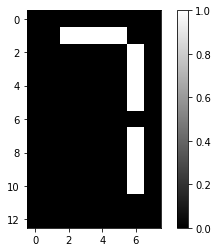

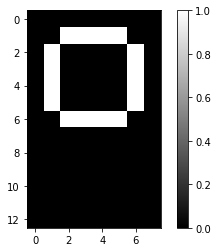

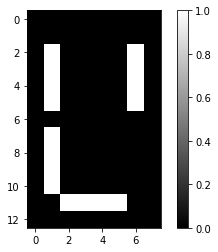

In [79]:
plot_digit(digits_array[0, :])
plot_digit(digits_array[1, :])
plot_digit(digits_array[5, :])

Let's fit an NMF model to these digtis. We will set the number of components to 7 because it's seven segment digits. We should expect to have the components as the 7 LEDs in the 7-segment.

C:\Users\U\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


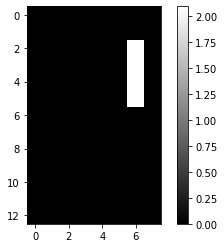

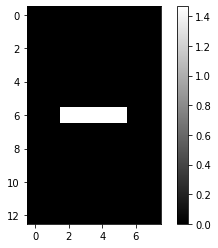

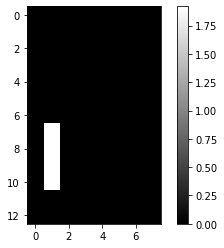

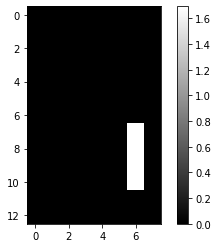

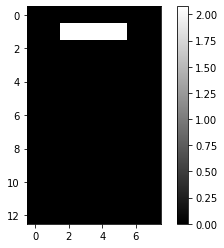

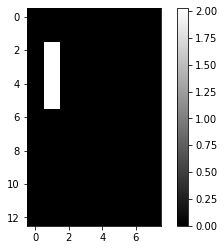

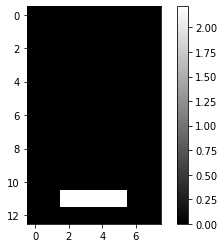

In [80]:
sev_seg_nmf = NMF(n_components=7)
sev_seg_nmf.fit(digits_array)
for component in sev_seg_nmf.components_:
    plot_digit(component)

PCA doesn't learn parts of images or topics of the articles. It creates new components that can be used to represent the data in a more-compressed mode.

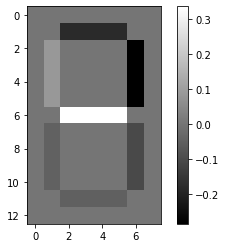

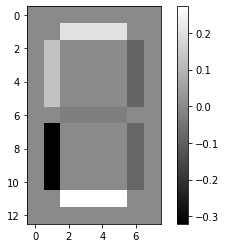

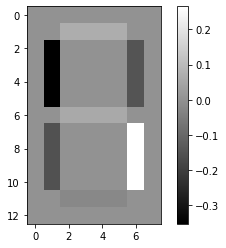

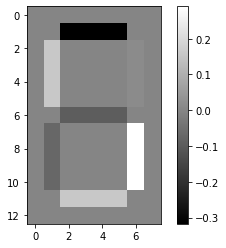

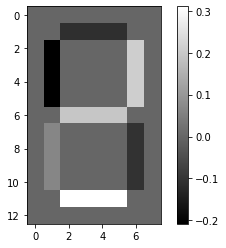

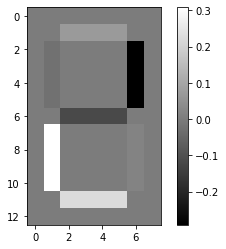

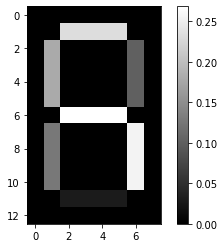

In [82]:
from sklearn.decomposition import PCA
sev_seg_pca = PCA(n_components=7)
sev_seg_pca.fit(digits_array)
for component in sev_seg_pca.components_:
    plot_digit(component)

### Building recommender systems using NMF

Using NMF, we can recommend for example articles that are about the same topic as in an article one have spent some time reading. Same topic means clone NMF features.

Using **cosine similarity** to deduce the similarity between 2 features will tell if they are close or not. If they are close, we should recommend that article to the reader and vice versa.


To use the cosine similarity, we can use the `dot` method between 2 arrays or between dataframes. However, make sure that the arrays are normalized using the normalize function from sklearn.

In [85]:
from sklearn.preprocessing import normalize

normalized_features = normalize(wiki_nmf.transform(articles))

df = pd.DataFrame(normalized_features, index = titles)

article = df.loc["Cristiano Ronaldo"] # Siiiiiiiiii

similarities = df.dot(article)

similarities.nlargest()

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64